# Lab0 (part 2): Python for Digital Signal and Image Processing

In the last lab we practiced with basic one-dimensional signal manipulation in Python. The goal of this lab is to familiarize with basic image manipulation in the same environment. But before starting to work with images, let's add a new element to our Python expertise: functions.

## Warm up

We can define a new function with the following syntax.

In [2]:
from __future__ import division
def happyBirthday(name='Manny'):
    print("Happy Birthday to you!")
    print("Happy Birthday to you!")
    print("Happy Birthday, dear {}.".format(name))
    print("Happy Birthday to you!")

And then we can simply call the function with:

In [3]:
happyBirthday(name='Emily')

Happy Birthday to you!
Happy Birthday to you!
Happy Birthday, dear Emily.
Happy Birthday to you!


This example may seem trivial, but there actually a few questions that may arise. For instance, what happens if we don't specify an input argument? Or if we don't use the keyword *<font face="TrueType">name</font>*? Does this function return something?

Try to answer to those questions playing a bit with the <font face="TrueType">happyBirthday</font> function in the next box.

In [4]:
happyBirthday()

Happy Birthday to you!
Happy Birthday to you!
Happy Birthday, dear Manny.
Happy Birthday to you!


Is it everything clear? Cool. Let's move on.

The command **<font face="TrueType", color="green">return</font>** can be used to control the output of a function. Write a simple function that always returns a string (e.g. "<font face="TrueType">blue</font>").

In [5]:
def always_blue(**pippo):
    my_string="Blue"
    return my_string
print("Your function returned: {}.".format(always_blue()))

Your function returned: Blue.


Well done!

Our warm up is over, before starting the actual workout, let's import the Python modules introduced in the last lab.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Are you ready? Let's get it started!

## Basic image operations

In this lab we work with two-dimensional signals, i.e. images. A handy Python module for image manipulation is called <a href="http://scikit-image.org/"><font style="TrueType">scikit-image</font></a>, let's import it and then we can use it to load and display some pictures.

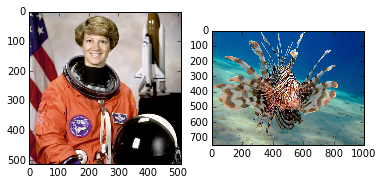

In [7]:
from skimage import data

astro = data.astronaut() # scikit-image comes already with some images (try to use the <TAB> key on data.)
fish = data.imread('lionfish.jpg') # or you can load a custom one

plt.subplot(1,2,1)
plt.imshow(astro)

plt.subplot(1,2,2)
plt.imshow(fish);

Can you guess data type and shape of the images?

In [8]:
print(fish.shape)
print(astro.shape)

(749L, 1000L, 3L)
(512L, 512L, 3L)


As expected, an *RGB* image is stored in memory as a three dimensional array ($shape = rows \times columns \times channels$). The intensities of each color channel are saved in a separate matrix.

Do you remember how to slice a <font face="TrueType">numpy.array</font>? Try to extract the three color channels from an image of choice and print their shape.

In [9]:
R = astro[:,:,0]
G = astro[:,:,1]
B = astro[:,:,2]
print("R shape is: {}".format(R.shape))
print("G shape is: {}".format(G.shape))
print("B shape is: {}".format(B.shape))

R shape is: (512L, 512L)
G shape is: (512L, 512L)
B shape is: (512L, 512L)


Let's try to inspect the content of a channel, for instance printing the first 5 elements of the first 3 lines of the red one.

In [10]:
#for i in range(5):
 #   for j in range(3):
print(R[:3,:5])

[[154 109  63  54  76]
 [177 144 113 106 128]
 [201 182 168 159 167]]


It looks like an image is stored in memory as a matrix filled with integer numbers. Can you guess the right range? Check it out in the next box.

Hint: you can use <font face="TrueType">np.max</font> and <font face="TrueType">np.min</font> on any input <font face="TrueType">numpy.array</font>.

In [11]:
print("Max value for the red channel: {}".format(np.max(R)))
print("Min value for the red channel: {}".format(np.min(R)))

Max value for the red channel: 255
Min value for the red channel: 0


8-bit images are stored in memory as matrices filled with integer numbers spanning between $0$ and $255$. However, sometimes it is useful to represent an image as a matrix of float spanning from $0$ to $1$. Write a Python function that implements such normalization and test it on an input matrix.

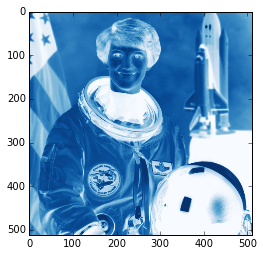

In [12]:
def my_uint2float(img):
    return ((1/255)*img)
plt.imshow(my_uint2float(R), cmap='Blues');

Well done. However, <font face="TrueType">skimage</font> can do that for us. Check the documentation of <a href="http://scikit-image.org/docs/dev/api/skimage.html#skimage.img_as_float"><font face="TrueType">skimage.img_as_float</font></a>.

In [13]:
import skimage
skimage.img_as_float??

Now, apply your new function on the three channels and try to visualize them in separate sections of the same figure. In which channel do you expect the astronaut suit will have highest values?

Hint 1: use <a href="http://matplotlib.org/api/colorbar_api.html"><font face="TrueType">plt.colorbar</font></a> to see the color mapping.

Hint 2: stick to the same colormap used before.

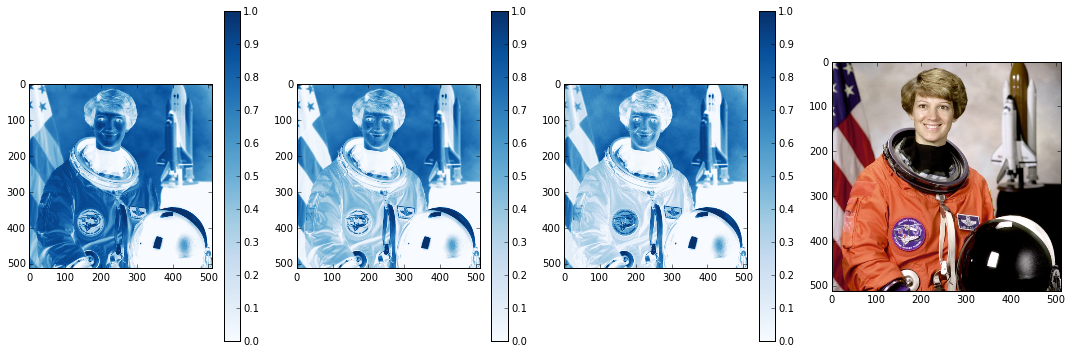

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.imshow(skimage.img_as_float(R), cmap='Blues');
plt.colorbar()
plt.subplot(1,4,2)
plt.imshow(skimage.img_as_float(G), cmap='Blues');
plt.colorbar()
plt.subplot(1,4,3)
plt.imshow(skimage.img_as_float(B), cmap='Blues');
plt.colorbar()
plt.subplot(1,4,4)
plt.imshow(astro)


plt.tight_layout() # a handy command that increases spacing between subplots

Did you guess the right color channel? Bravo! Let's move on.

## RGB to grayscale conversion

So, a color image is a collection of three matrices each one representing a different color channel. How can we represent a grayscale image? How many *color channels* do we need? We know that it's possible to encode a color image in grayscale using the following linear transformation:

$Y = 0.2125 \cdot R + 0.7154 \cdot G + 0.0721 \cdot B$

*The coefficients represent the measured intensity perception of typical trichromat humans, depending on the primaries being used; in particular, human vision is most sensitive to green and least sensitive to blue.* [cit. <a href="https://en.wikipedia.org/wiki/Grayscale">Wikipedia</a>]

Write a Python function that converts the three channels of an input RGB image to float and then combines them in a grayscale encoding.

In [15]:
def my_rgb2gray(img):
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    Y = 0.2125*R+0.7154*G+0.0721*B
    Y=my_uint2float(Y)
    return Y

Now test it on one of the images above (to obtain more pleasant results try to specify the option <font face="TrueType">cmap='gray'</font> for the function <font face="TrueType">plt.imshow</font>).

<matplotlib.colorbar.Colorbar instance at 0x000000000A74D708>

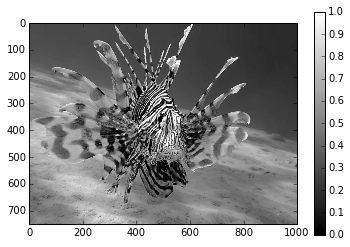

In [16]:
plt.imshow(my_rgb2gray(fish), cmap='gray');
plt.colorbar()

Very good. We developed our grayscale conversion utility, but as you can imagine <font face="TrueType">skimage</font> can do that for us. Import the <font face="TrueType">color</font> module from the main library and check the help function for <a href="http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2gray"><font face="TrueType">color.rgb2gray</font></a>.

In [17]:
from skimage import color
color.rgb2gray??

<matplotlib.colorbar.Colorbar instance at 0x00000000138009C8>

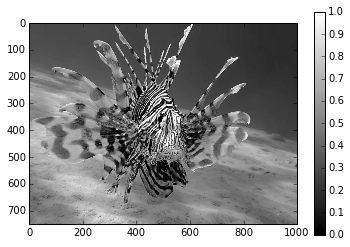

In [18]:
plt.imshow(color.rgb2gray(fish), cmap='gray');
plt.colorbar()

Apparently the two functions return the same thing. But, how can we be sure of that? In other words, can we measure the similarity between two images (matrices)? 

The answer is: of course we can, and there are several ways to to that. Let's introduce here the most basic image distance measure.

The key idea here is to unroll the two images $A$ and $B$ with shape <font face="TrueType">(m, n)</font>, in two vectors $a$ and $b$ shaped as <font face="TrueType">(m $\cdot$ n, 1)</font>. Then a simple distance between them can be evaluated as follows.

$$\text{RSS} = \sum_{i=0}^{m\cdot n} (a_i - b_i)^2$$

This measure is known as <a href="https://en.wikipedia.org/wiki/Residual_sum_of_squares">Residual Sum of Squares</a> and it's gonna be useful in the next classes.

Implement a Python function that calculates the RSS between two input images and test it on the output obtained from <font face="TrueType">color.rgb2gray</font> and <font face="TrueType">my_rgb2gray</font> on the same image.

In [19]:
def RSS(a, b):
    ris = np.dot(a.ravel()-b.ravel(),a.ravel()-b.ravel())
    return ris

In [20]:
fish1 = color.rgb2gray(fish)
fish2= my_rgb2gray(fish)
print("RSS(fish1, fish2) = {}".format(RSS(fish1,fish2)))

RSS(fish1, fish2) = 2.28413864128e-27


Did you get $RSS=0$? Good.

## Histograms

Another strategy to check the distance between images is to take advantage of their color intensity distribution on the three channels, let's try to visualize them as histograms using the image of the lionfish.

Hint: check the documentation of  <font face="TrueType">plt.hist</font>.

In [21]:
plt.hist??

[ 0  0  0 ..., 88 89 91]


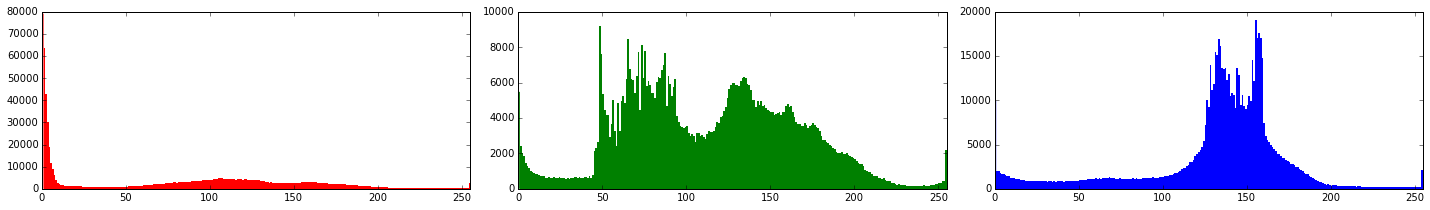

In [22]:
R = fish[:,:,0].flatten()
G = fish[:,:,1].flatten()
B = fish[:,:,2].flatten()

plt.figure(figsize=(20,3))

# --- complete here --- #
plt.subplot(1,3,1)
plt.xlim([0, 255])
plt.hist(R, bins=255, color='red', lw=0)
plt.subplot(1,3,2)
plt.xlim([0, 255])
plt.hist(G, bins=255, color='green', lw=0)
plt.subplot(1,3,3)
plt.xlim([0, 255])
plt.hist(B, bins=255, color='blue', lw=0)

plt.tight_layout() # a handy command that increases spacing between subplots

From those histograms it looks like the blue channel can be used to discriminate the foreground (a lionfish) from the background. This is gonna be the goal of the next section.

## Background suppression

A <i>binary mask</i> is an simple but effective way to perform a fast background suppression. You can obtain a binary mask in several ways, let's see an example. Create $A$: a simple $3\times 3$ matrix and then print a binary mask corresponding to the positions where its values are bigger than a certain threshold.

In [23]:
A = np.tile(np.array([3, 1, 5]), (3, 1))
threshold = 2
m = A>threshold
print(m)

[[ True False  True]
 [ True False  True]
 [ True False  True]]


Easy, right? Now you can perform a simple background suppression identifying two thresholds from the histogram above and then representing the binary mask of the values lying in between them.

Hint: check the documentation for <font face="TrueType">np.multiply</font>.

In [24]:
np.multiply??

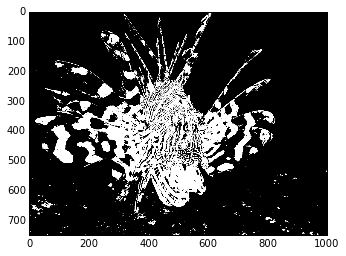

In [33]:
m1 = fish[:, :, 2] > 100
m2 = fish[:, :, 2] < 195
mask = np.logical_not(np.multiply(m1, m2))
plt.imshow(mask, cmap='gray');

We may think of improving a bit our mask performing some morphological operations (**optional**).

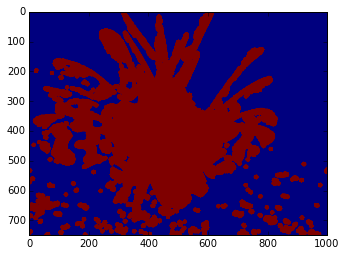

In [34]:
from skimage import morphology

selem = morphology.disk(8)
mask2 = morphology.dilation(mask, selem)

plt.imshow(mask2);

Now we can finally suppress the background in our image.

Hint 1: with <font face="TrueType">numpy</font> arrays you can use <font face="TrueType">bool</font> indexes.

Hint 2: to recompose an image that was previously decomposed in its three channels you can use <font face="TrueType">np.dstack</font>.

In [55]:
np.dstack??

Hint 3: <font face="TrueType">numpy</font> has some utilities to initialize matrices and vectors, check for instance <font face="TrueType">np.ones</font> or <font face="TrueType">np.zeros</font>.

In [56]:
np.ones??

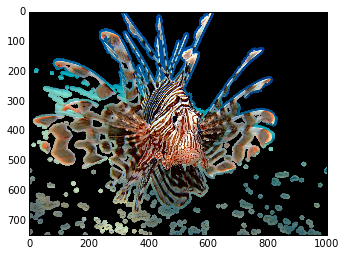

In [82]:
# --- complete here --- #
fishR = fish[:,:,0]
fishG = fish[:,:,1]
fishB = fish[:,:,2]
fishRFiltered = np.multiply(fishR, mask2)
fishGFiltered = np.multiply(fishG, mask2)
fishBFiltered = np.multiply(fishB, mask2)

fish2 = np.dstack((fishRFiltered, fishGFiltered, fishBFiltered))

plt.imshow(fish2);

The result is a bit ugly, yeah. But it's reasonable given its extreme simplicity.

## Image noise

As we did before for 1D signals, we can modify an image applying some transformations to the intensity of their pixels. Let's try, for instance, to write a function that converts an image to greyscale and then adds some Gaussian noise to it.

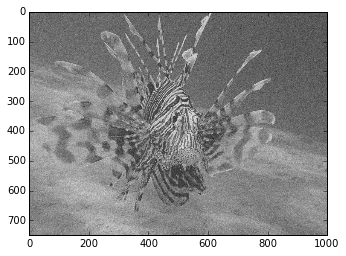

In [75]:
from skimage import color

def rgb2noisygray(img, mu, sigma):
    # --- complete here --- #
    gray_img = color.rgb2gray(img)
    noise = np.random.normal(mu, sigma, gray_img.shape)
    return gray_img + noise

noisy_img = rgb2noisygray(fish, 0, .1)
plt.imshow(noisy_img, cmap='gray');

### Exercises

Write some custom function that implement the following basic operations.

<ol>
<li>Decompose an image into its three channels, add some Gaussian random noise to each one of them, recompose and visualize the noisy image.</li>
<li>Pick an image you like and select the foreground, then suppress one its the three channels. The result may look like the following image.
<img src="ex2.png" width=600 height=450></img></li>
<li>Generate and visualize some 2D sinusoids.</li>
<li>Convert a color image to grayscale and then add the 2D sinusoidal noise you just generated. The output should look like the follwing image.
<img src="ex1.png" width=600 height=450></img>
Hint: check this out <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html"><font style="TrueType">np.meshgrid</font></a>
</li>
</ol>

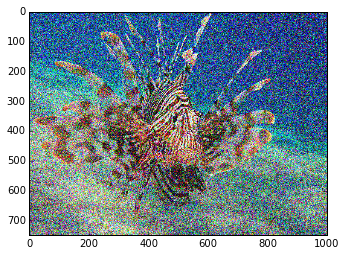

In [97]:
#Ex 1
def to_noisy(img, mu, sigma):
    return np.clip(np.round(img + np.random.normal(mu, sigma, img.shape)), 0, 255).astype('uint8')
    
fishR = fish[:,:,0]
fishG = fish[:,:,1]
fishB = fish[:,:,2]
rNoise = np.random.normal(0, .1, fishR.shape)
fishRNoisy = to_noisy(fishR, 0, 100)
fishGNoisy = to_noisy(fishG, 0, 100)
fishBNoisy = to_noisy(fishB, 0, 100)

fish2 = np.dstack((fishRNoisy, fishGNoisy, fishBNoisy))
plt.imshow(fish2)

# fish3 = to_noisy(fish, 0, 100)
# plt.imshow(fish3)

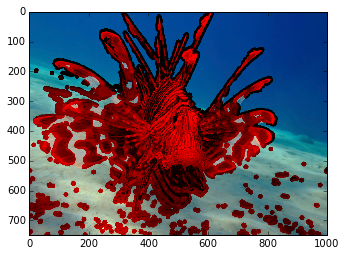

In [99]:
#Ex 2

fishR = fish[:,:,0]
fishG = fish[:,:,1]
fishB = fish[:,:,2]
foregroundMask = mask2
backgroundMask = np.logical_not(foregroundMask)
fishGBackground = np.multiply(fishG, backgroundMask)
fishBBackground = np.multiply(fishB, backgroundMask)

fish4 = np.dstack((fishR, fishGBackground, fishBBackground))
plt.imshow(fish4)

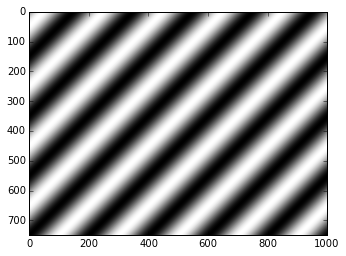

In [96]:
#Ex 3
m = fish.shape[0]
n = fish.shape[1]
A = 100/255
mgrid = np.mgrid[0:m, 0:n]
grid = mgrid[0,:, :] + mgrid[1,:, :]
sinusoid2d = A*np.sin(2*np.pi/n*5*grid)
plt.imshow(sinusoid2d, cmap='gray');

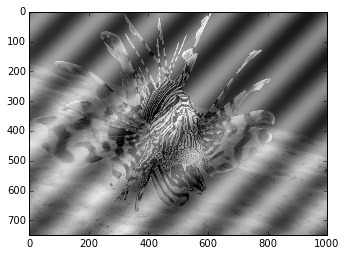

In [97]:
#Ex 4

fishWithSinusoid = color.rgb2gray(fish) + sinusoid2d
plt.imshow(fishWithSinusoid, cmap='gray');